## Setup, Loading Data and CDFs

In [1]:
DATA_NAME = 'full-scaleTesting-wavelet-laplace' # size-name-transform-channel

In [2]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()
Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "groupCDFs")).mkdir(exist_ok=True)

GROUP = 'layer' if path_dict['transform'] == 'wavelet' else ('band' if path_dict['transform'] == 'fourier' else 'error')
RERUN = True
CWD

'c:\\Users\\yashd\\Desktop\\hierarchical-bayesian-model-validation\\results\\case-studies\\scaleTesting\\wavelet\\full\\laplace'

In [3]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

In [23]:
num_samples = 10000
scale_values = sorted([round_to_sigfigs(x, 4) for x in np.logspace(-0.5, 2.5, 20)] + [round_to_sigfigs(1/np.sqrt(2))])
fake_data = { round_to_sigfigs(i) : np.sort(scipy.stats.laplace.rvs(loc = 0, size = num_samples, scale = i)) for i in scale_values}
fake_total_samples = { i : num_samples for i in scale_values}
fake_total_samples

{0.3162: 10000,
 0.4549: 10000,
 0.6543: 10000,
 0.70710678: 10000,
 0.9412: 10000,
 1.354: 10000,
 1.947: 10000,
 2.801: 10000,
 4.03: 10000,
 5.796: 10000,
 8.338: 10000,
 11.99: 10000,
 17.25: 10000,
 24.82: 10000,
 35.7: 10000,
 51.35: 10000,
 73.86: 10000,
 106.2: 10000,
 152.8: 10000,
 219.8: 10000,
 316.2: 10000}

In [24]:
group_data_map = fake_data
group_total_samples = fake_total_samples
if path_dict['transform'] == 'fourier':
    GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)[::3]
else:
    GROUPS = scale_values

cdfs_dir = os.path.join(ROOT_DIR, "results", "CDFs")
cdfs_list = [os.path.join(cdfs_dir, i) for i in os.listdir(cdfs_dir)]
all_cdfs = combine_pickles(cdfs_list[0])
for cdf_dir in cdfs_list[1:]:
    all_cdfs = all_cdfs | combine_pickles(cdf_dir)
    
# group_data_map = {g : group_data_map[g][::100] for g in GROUPS} # For quick testing purposes
group_total_samples

{0.3162: 10000,
 0.4549: 10000,
 0.6543: 10000,
 0.70710678: 10000,
 0.9412: 10000,
 1.354: 10000,
 1.947: 10000,
 2.801: 10000,
 4.03: 10000,
 5.796: 10000,
 8.338: 10000,
 11.99: 10000,
 17.25: 10000,
 24.82: 10000,
 35.7: 10000,
 51.35: 10000,
 73.86: 10000,
 106.2: 10000,
 152.8: 10000,
 219.8: 10000,
 316.2: 10000}

In [25]:
''' Only need to run commented code once'''
all_cdfs_df = create_kurt_var_ksstat_df(all_cdfs)
coarse_cdf_df = all_cdfs_df[(np.round(all_cdfs_df['r'], 0) == all_cdfs_df['r']) & (np.round(all_cdfs_df['eta'], 0) == all_cdfs_df['eta'])]
var_values_dict = dict()
kurt_values_dict = dict()
master_df = pd.DataFrame(columns=[GROUP]).set_index(GROUP)
all_cdfs_df.head()

c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:824: RuntimeWarning: invalid value encountered in scalar divide
  var_prior = scale * scipy.special.gamma(beta + 1/r)/scipy.special.gamma(beta)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:829: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:829: RuntimeWarning: overflow encountered in scalar power
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:829: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2


,"(r,eta),cdf",r,eta,cdf,variance,kurtosis
0,"((0.02, -1.4), <scipy.interpolate._fitpack2.In...",0.02,-1.4,<scipy.interpolate._fitpack2.InterpolatedUniva...,9.618487e+69,1.391529e+25
1,"((0.02, -1.3), <scipy.interpolate._fitpack2.In...",0.02,-1.3,<scipy.interpolate._fitpack2.InterpolatedUniva...,3.821735e+74,8.172634e+21
2,"((0.02, -1.2), <scipy.interpolate._fitpack2.In...",0.02,-1.2,<scipy.interpolate._fitpack2.InterpolatedUniva...,1.455488e+78,4.131785e+19
3,"((0.02, -1.1), <scipy.interpolate._fitpack2.In...",0.02,-1.1,<scipy.interpolate._fitpack2.InterpolatedUniva...,1.406735e+81,6.947275e+17
4,"((0.02, -1.0), <scipy.interpolate._fitpack2.In...",0.02,-1.0,<scipy.interpolate._fitpack2.InterpolatedUniva...,5.331443e+83,2.562075e+16


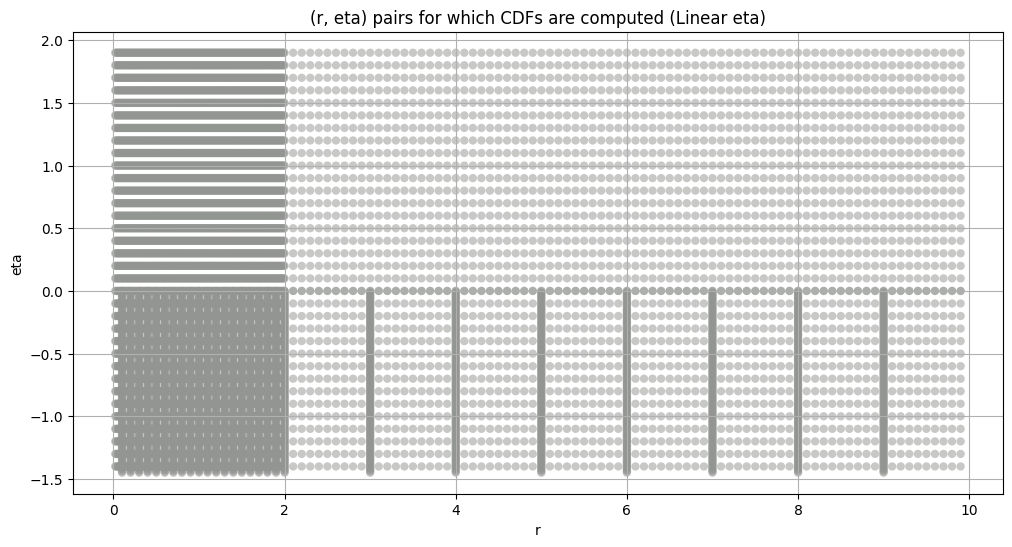

{(0.02,
  -1.4): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x1f7034cd810>,
 (0.02,
  -1.3): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x1f6564ecc10>,
 (0.02,
  -1.2): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x1f6564eced0>,
 (0.02,
  -1.1): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x1f6564ed190>,
 (0.02,
  -1.0): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x1f6564ed450>,
 (0.02,
  -0.9): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x1f6564ed710>,
 (0.02,
  -0.8): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x1f6564ed9d0>,
 (0.02,
  -0.7): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x1f6564edd10>,
 (0.02,
  -0.6): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x1f6564ee050>,
 (0.02,
  -0.5): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x1f6564ee410>,
 (0.02,
  -0.4): <scipy.interpolate._fitpack2.InterpolatedUn

In [26]:
temp_df = all_cdfs_df[(all_cdfs_df['eta'] < 2) & (all_cdfs_df['r'] < 10)]
create_scatter_plot(temp_df)
temp_df.shape
all_cdfs_df = temp_df
all_cdfs = {x[0] : x[1] for x in temp_df['(r,eta),cdf']}
all_cdfs

## Bootstrapping the Variance and Kurtosis

In [27]:
n_bootstrap = int(1e3)
bootstrap_size = int(1e3)
ci = 0.99

In [28]:
bootstrap_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))
master_df_var_kurt_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

if RERUN or not master_df_var_kurt_path.exists():
    for group in GROUPS:
        print(f'{GROUP.capitalize()} {group}')
        obs_var, var_lower, var_upper, var_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                n_bootstrap=n_bootstrap, 
                                                                                bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                metric= np.var, 
                                                                                ci=ci)
        obs_kurt, kurt_lower, kurt_upper, kurt_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                    n_bootstrap=n_bootstrap, 
                                                                                    bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                    metric= stats.kurtosis, ci=ci)  
        master_df.loc[group, 'obs_var'], master_df.loc[group, 'var_lower'], master_df.loc[group, 'var_upper'] = obs_var, var_lower, var_upper
        master_df.loc[group, 'obs_kurt'], master_df.loc[group, 'kurt_lower'], master_df.loc[group, 'kurt_upper'] = obs_kurt, kurt_lower, kurt_upper
        master_df.loc[group, 'total_samples'] = group_total_samples[group]

    master_df.to_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

master_df = pd.read_csv(master_df_var_kurt_path, index_col=GROUP)
var_kurt_df = pd.read_csv(bootstrap_path, index_col=GROUP)
master_df

Layer 0.3162


100%|██████████| 1000/1000 [00:00<00:00, 2039.77it/s]


Layer 0.4549


100%|██████████| 1000/1000 [00:00<00:00, 1299.71it/s]


Layer 0.6543


100%|██████████| 1000/1000 [00:00<00:00, 1318.44it/s]


Layer 0.70710678


100%|██████████| 1000/1000 [00:00<00:00, 1455.63it/s]


Layer 0.9412


100%|██████████| 1000/1000 [00:00<00:00, 1195.04it/s]


Layer 1.354


100%|██████████| 1000/1000 [00:00<00:00, 1037.92it/s]


Layer 1.947


100%|██████████| 1000/1000 [00:01<00:00, 607.78it/s]


Layer 2.801


100%|██████████| 1000/1000 [00:00<00:00, 1334.93it/s]


Layer 4.03


100%|██████████| 1000/1000 [00:00<00:00, 1383.76it/s]


Layer 5.796


100%|██████████| 1000/1000 [00:00<00:00, 1251.24it/s]


Layer 8.338


100%|██████████| 1000/1000 [00:00<00:00, 1563.87it/s]


Layer 11.99


100%|██████████| 1000/1000 [00:00<00:00, 1359.12it/s]


Layer 17.25


100%|██████████| 1000/1000 [00:00<00:00, 1952.74it/s]


Layer 24.82


100%|██████████| 1000/1000 [00:00<00:00, 1501.87it/s]


Layer 35.7


100%|██████████| 1000/1000 [00:00<00:00, 1192.59it/s]


Layer 51.35


100%|██████████| 1000/1000 [00:00<00:00, 1367.08it/s]


Layer 73.86


100%|██████████| 1000/1000 [00:00<00:00, 1423.19it/s]


Layer 106.2


100%|██████████| 1000/1000 [00:00<00:00, 1272.81it/s]


Layer 152.8


100%|██████████| 1000/1000 [00:00<00:00, 1687.74it/s]


Layer 219.8


100%|██████████| 1000/1000 [00:00<00:00, 1531.81it/s]


Layer 316.2


100%|██████████| 1000/1000 [00:00<00:00, 1890.40it/s]


,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples
layer,,,,,,,
0.316200,0.193357,0.160801,0.236888,3.385510,1.356045,6.731142,10000.0
0.454900,0.414368,0.341414,0.489554,2.856823,1.484867,5.035099,10000.0
0.654300,0.849068,0.697601,1.023004,3.271503,1.014398,8.106793,10000.0
0.707107,0.988003,0.821338,1.171903,2.609212,1.239022,4.613782,10000.0
0.941200,1.757791,1.465239,2.075051,2.801525,1.308895,4.589595,10000.0
1.354000,3.795530,3.143165,4.456044,2.973003,1.440938,4.982483,10000.0
1.947000,7.681313,6.443957,9.004858,2.827428,1.294215,5.011916,10000.0
2.801000,15.985559,13.209583,19.097712,3.130743,1.334741,6.156874,10000.0
4.030000,33.039037,27.032692,39.113258,3.058014,1.330339,7.122394,10000.0


In [29]:
scipy.stats.ks_1samp(fake_data[0.70710678], compute_prior_cdf(1, -0.5))

Params: 1, -0.5
Chebyshev bound: 31.622776601683793
No tail


100%|██████████| 500/500 [00:04<00:00, 120.22it/s]


Maximum Diff in y-values: 0.04286162481746608


100%|██████████| 500/500 [00:04<00:00, 120.84it/s]

Maximum Diff in y-values with new points: 0.0010464787360429106
First CDF value: 1.89078966425973e-20
Last CDF value: 1.0
Tail bound: 0.001
KstestResult(statistic=0.008448085521013837, pvalue=0.4706977288221703, statistic_location=0.7373112143904793, statistic_sign=1)


KstestResult(statistic=0.007285288606509899, pvalue=0.6605697093904714, statistic_location=-0.08290210629107968, statistic_sign=-1)

1. tool to compute var for r, eta. rescale input var to match variance under scale transform
2. 

## Initial Grid Search and Hypothesis Test Plots

####
Layer  0.3162


100%|██████████| 13088/13088 [00:34<00:00, 380.80it/s]


Finding Minimum after computing 13088 CDFs
Number of samples: 10000, Without approximation : 10000.0


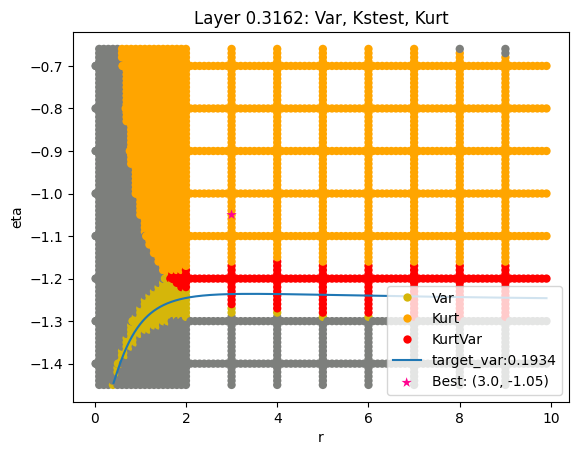

####
Layer  0.4549


100%|██████████| 13088/13088 [00:28<00:00, 456.73it/s]


Finding Minimum after computing 13088 CDFs
Number of samples: 10000, Without approximation : 10000.0


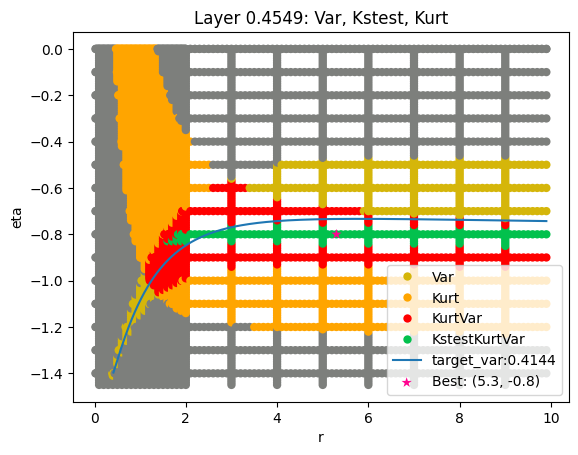

####
Layer  0.6543


100%|██████████| 13088/13088 [00:29<00:00, 440.52it/s]


Finding Minimum after computing 13088 CDFs
Number of samples: 10000, Without approximation : 10000.0


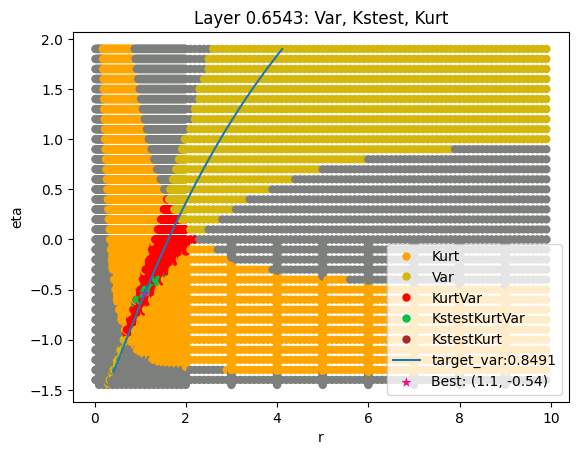

####
Layer  0.70710678


100%|██████████| 13088/13088 [00:29<00:00, 448.37it/s]


Finding Minimum after computing 13088 CDFs
Number of samples: 10000, Without approximation : 10000.0


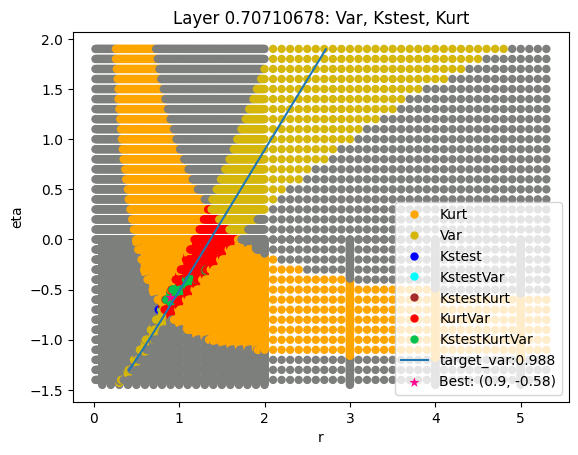

####
Layer  0.9412


100%|██████████| 13088/13088 [00:29<00:00, 450.73it/s]


Finding Minimum after computing 13088 CDFs
Number of samples: 10000, Without approximation : 10000.0


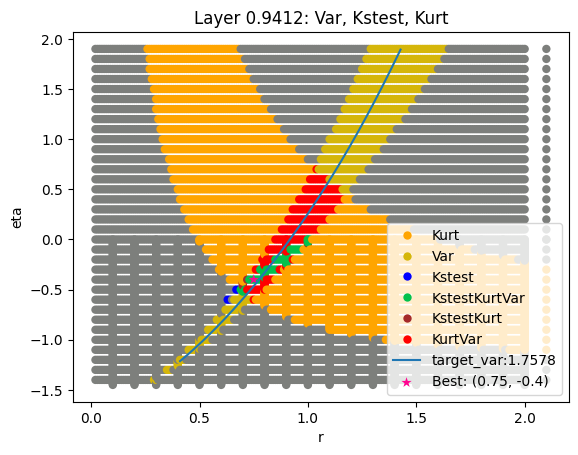

####
Layer  1.354


100%|██████████| 13088/13088 [00:26<00:00, 486.47it/s]


Finding Minimum after computing 13088 CDFs
Number of samples: 10000, Without approximation : 10000.0


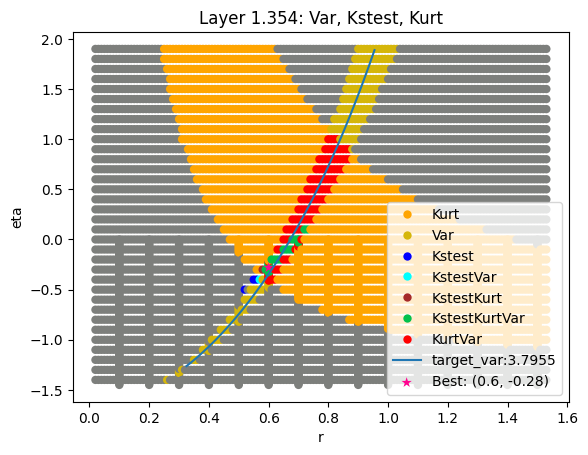

####
Layer  1.947


100%|██████████| 13088/13088 [00:28<00:00, 452.24it/s]


Finding Minimum after computing 13088 CDFs
Number of samples: 10000, Without approximation : 10000.0


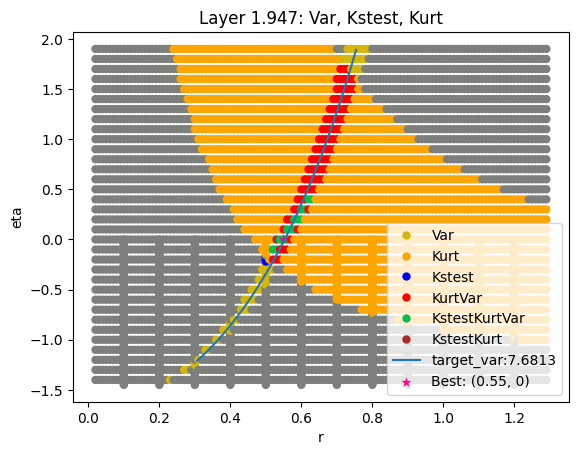

####
Layer  2.801


100%|██████████| 13088/13088 [00:28<00:00, 464.29it/s]


Finding Minimum after computing 13088 CDFs
Number of samples: 10000, Without approximation : 10000.0


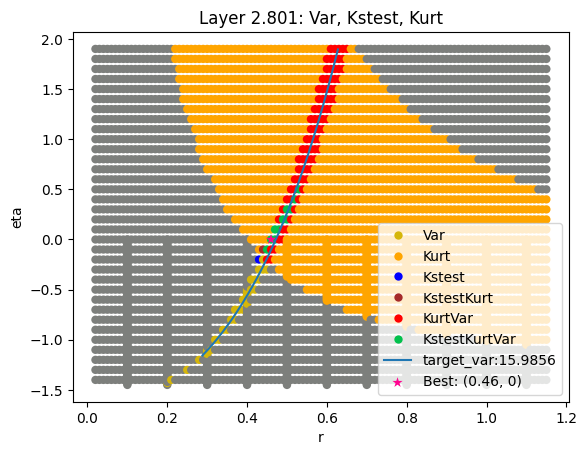

####
Layer  4.03


100%|██████████| 13088/13088 [00:32<00:00, 408.42it/s]


Finding Minimum after computing 13088 CDFs
Number of samples: 10000, Without approximation : 10000.0


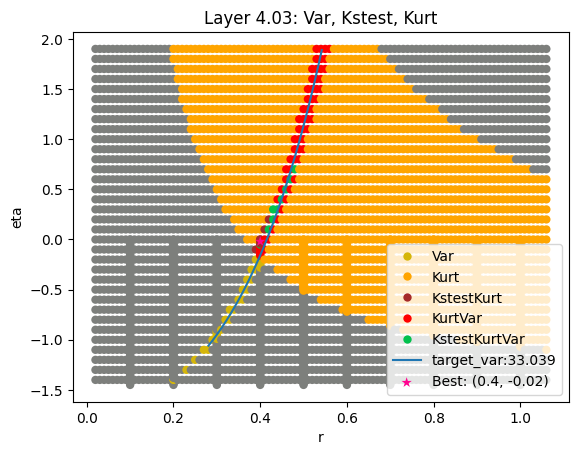

####
Layer  5.796


100%|██████████| 13088/13088 [00:27<00:00, 471.28it/s]


Finding Minimum after computing 13088 CDFs
Number of samples: 10000, Without approximation : 10000.0


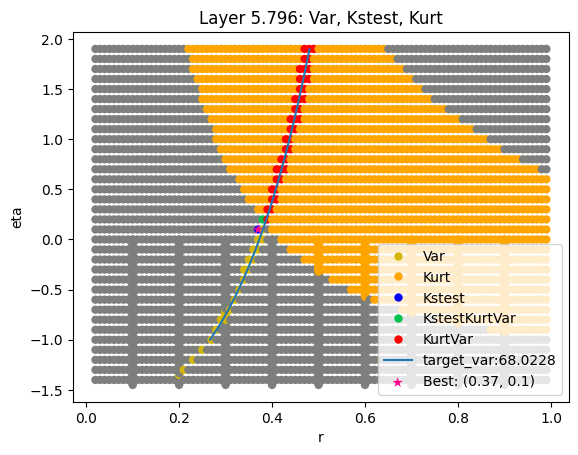

####
Layer  8.338


100%|██████████| 13088/13088 [00:28<00:00, 465.16it/s]


Finding Minimum after computing 13088 CDFs
Number of samples: 10000, Without approximation : 10000.0


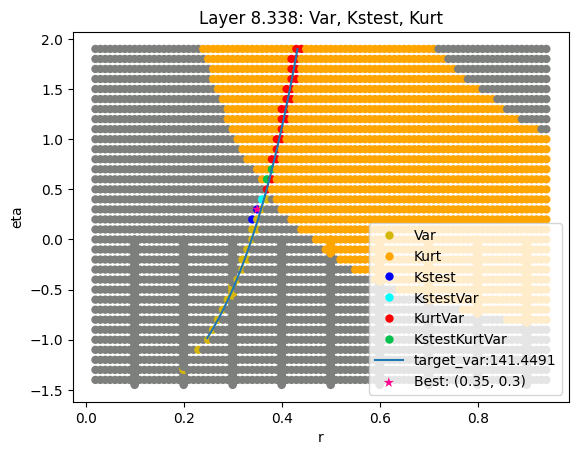

####
Layer  11.99


100%|██████████| 13088/13088 [00:27<00:00, 478.73it/s]


Finding Minimum after computing 13088 CDFs
Number of samples: 10000, Without approximation : 10000.0


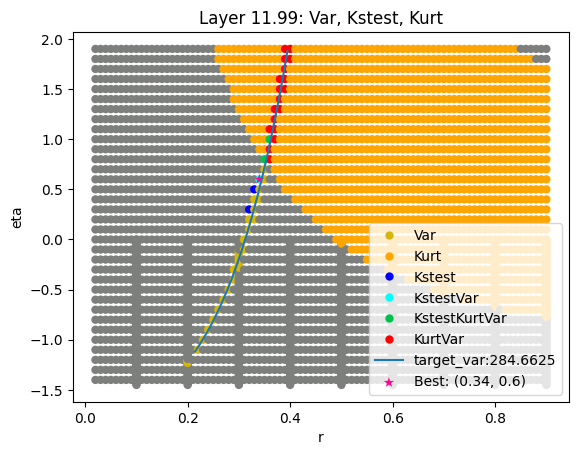

####
Layer  17.25


100%|██████████| 13088/13088 [00:26<00:00, 494.89it/s]


Finding Minimum after computing 13088 CDFs
Number of samples: 10000, Without approximation : 10000.0


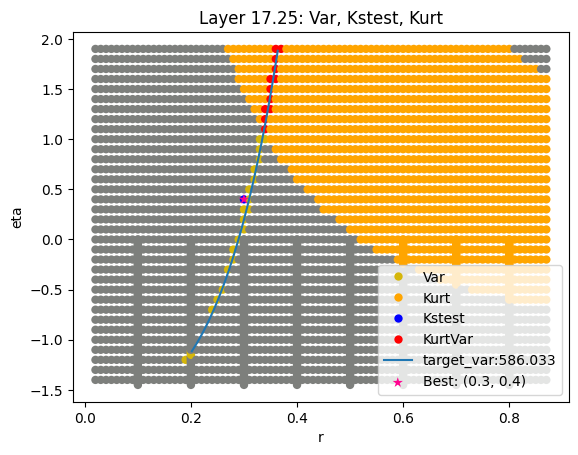

####
Layer  24.82


100%|██████████| 13088/13088 [00:26<00:00, 496.92it/s]


Finding Minimum after computing 13088 CDFs
Number of samples: 10000, Without approximation : 10000.0


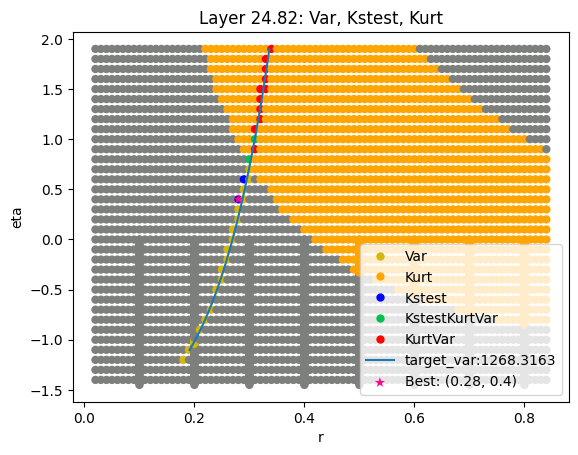

####
Layer  35.7


100%|██████████| 13088/13088 [00:25<00:00, 512.97it/s]


Finding Minimum after computing 13088 CDFs
Number of samples: 10000, Without approximation : 10000.0


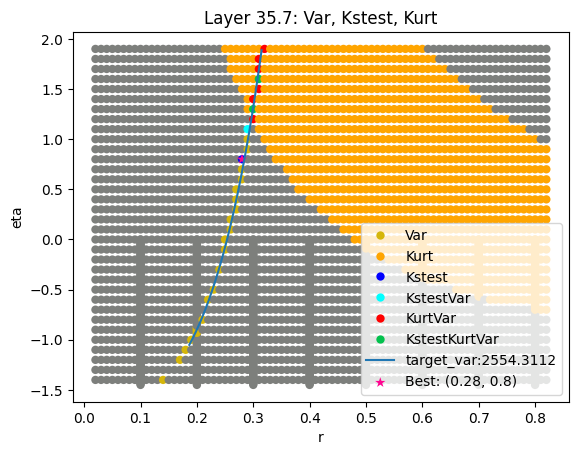

####
Layer  51.35


100%|██████████| 13088/13088 [00:26<00:00, 485.65it/s]


Finding Minimum after computing 13088 CDFs
Number of samples: 10000, Without approximation : 10000.0


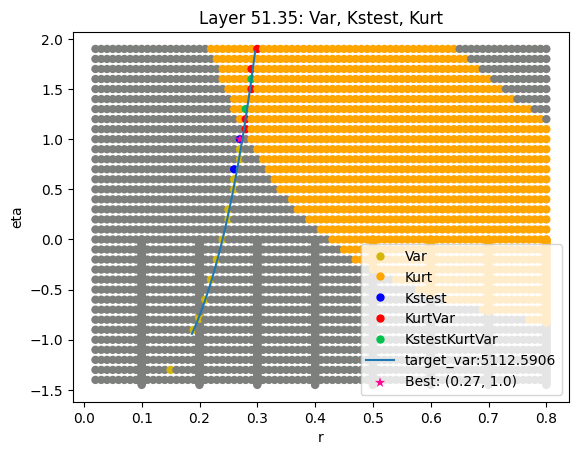

####
Layer  73.86


100%|██████████| 13088/13088 [00:26<00:00, 486.75it/s]


Finding Minimum after computing 13088 CDFs
Number of samples: 10000, Without approximation : 10000.0


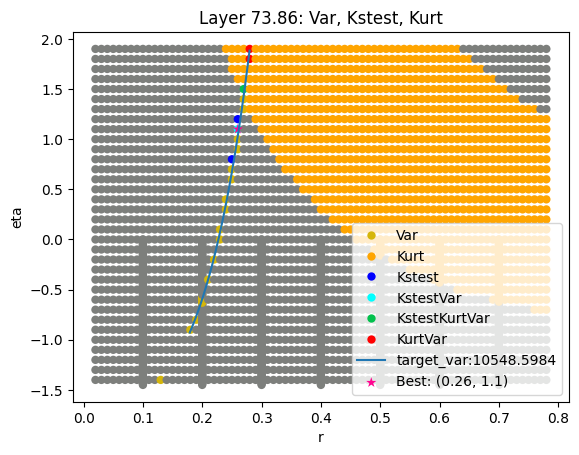

####
Layer  106.2


100%|██████████| 13088/13088 [00:25<00:00, 510.67it/s]


Finding Minimum after computing 13088 CDFs
Number of samples: 10000, Without approximation : 10000.0


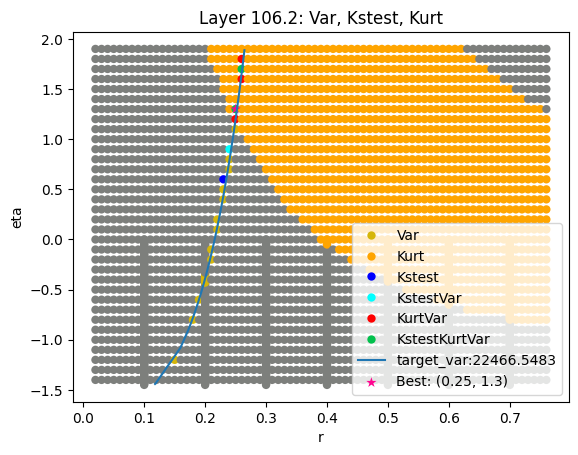

####
Layer  152.8


100%|██████████| 13088/13088 [00:33<00:00, 394.98it/s]


Finding Minimum after computing 13088 CDFs
Number of samples: 10000, Without approximation : 10000.0


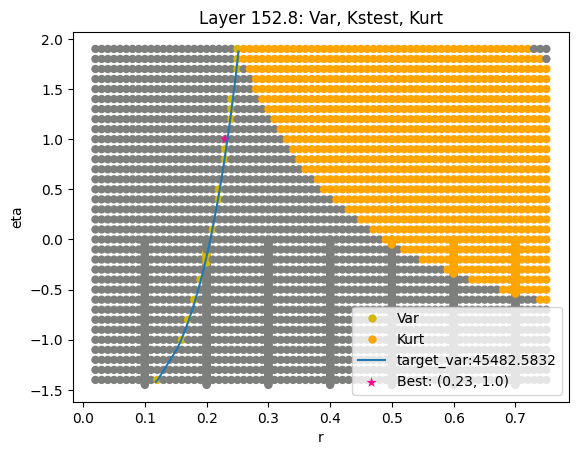

####
Layer  219.8


100%|██████████| 13088/13088 [00:29<00:00, 444.33it/s]


Finding Minimum after computing 13088 CDFs
Number of samples: 10000, Without approximation : 10000.0


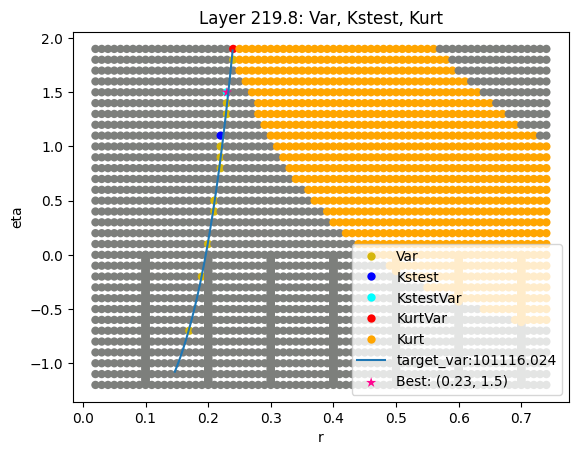

####
Layer  316.2


100%|██████████| 13088/13088 [00:30<00:00, 422.63it/s]


Finding Minimum after computing 13088 CDFs
Number of samples: 10000, Without approximation : 10000.0


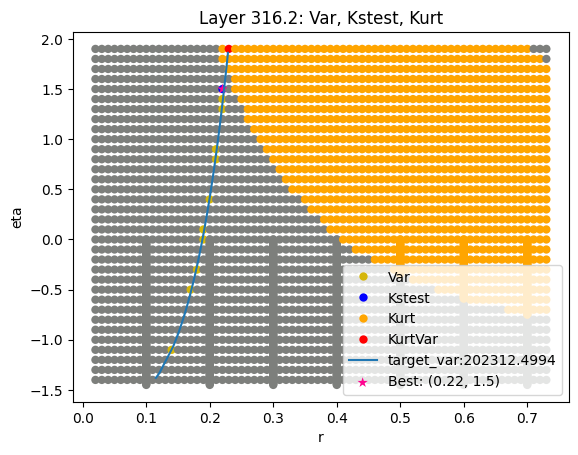

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,kstest_stat_cutoff_0.05
layer,,,,,,,,,,,
0.316200,0.193357,0.160801,0.236888,3.385510,1.356045,6.731142,10000.0,3.00,-1.05,0.033979,0.013564
0.454900,0.414368,0.341414,0.489554,2.856823,1.484867,5.035099,10000.0,5.30,-0.80,0.007779,0.013564
0.654300,0.849068,0.697601,1.023004,3.271503,1.014398,8.106793,10000.0,1.10,-0.54,0.008450,0.013564
0.707107,0.988003,0.821338,1.171903,2.609212,1.239022,4.613782,10000.0,0.90,-0.58,0.006937,0.013564
0.941200,1.757791,1.465239,2.075051,2.801525,1.308895,4.589595,10000.0,0.75,-0.40,0.005472,0.013564
1.354000,3.795530,3.143165,4.456044,2.973003,1.440938,4.982483,10000.0,0.60,-0.28,0.005800,0.013564
1.947000,7.681313,6.443957,9.004858,2.827428,1.294215,5.011916,10000.0,0.55,0.00,0.008032,0.013564
2.801000,15.985559,13.209583,19.097712,3.130743,1.334741,6.156874,10000.0,0.46,0.00,0.006225,0.013564
4.030000,33.039037,27.032692,39.113258,3.058014,1.330339,7.122394,10000.0,0.40,-0.02,0.008413,0.013564


In [30]:
master_df_combo_path = Path(os.path.join(CWD, "CSVs", "master_df_combo.csv"))

if RERUN or not master_df_combo_path.exists():
    sorted_params = sorted(all_cdfs)
    group_cdf_df_dict = dict()
    ksstats_dict = dict()

    for i, group in enumerate(GROUPS):
        print(f"####\n{GROUP.capitalize()} ", group)
        sample = group_data_map[group]
        group_cdf_df = all_cdfs_df.copy()
        ksstats, initial_param, min_stat = gridsearch(sample, all_cdfs, debug=True)
        master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta'] = initial_param
        print(f"Number of samples: {sample.size}, Without approximation : {master_df.loc[group, 'total_samples']}")
        master_df.loc[group, 'kstest_stat_initial'] = min_stat
        cutoff = stats.kstwo(n=master_df.loc[group, 'total_samples']).isf(0.05)
        master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff

        group_cdf_df = add_tests_to_df(cdfs_df = group_cdf_df, group = group, var_kurt_df = master_df, ksstats = ksstats)
        group_cdf_df_dict[group] = group_cdf_df
        cols = ['pass_var', 'pass_kstest', 'pass_kurt']

        fig = combo_test_plot(group_cdf_df_dict[group], cols, 
                            plot_name=f"{GROUP.capitalize()} {group}: {', '.join([col[5:].capitalize() for col in cols])}", 
                            target_var = master_df.loc[group, 'obs_var'],
                            best_param = initial_param)
        
        fig.figure.savefig(os.path.join(CWD, "plots", f"full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)

        # Optional: Create plots of bootstrapped variance and kurtosis for varying confidence intervals
        # fig_var = create_ci_scatter_plot(group_cdf_df_dict[group], var_values_dict, metric='variance', group=group)
        # fig_kurt = create_ci_scatter_plot(group_cdf_df_dict[group], kurt_values_dict, metric='kurtosis', group=group)

        # fig_var.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_var)
        # fig_kurt.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_kurt)

    master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_combo.csv"))

master_df = pd.read_csv(master_df_combo_path, index_col=GROUP)
master_df

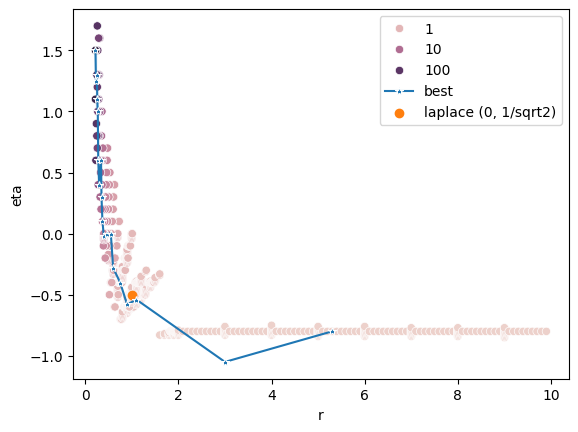

In [56]:
from matplotlib.colors import LogNorm
group_dfs = []
for scale, df in group_cdf_df_dict.items():
    df['scale'] = scale
    group_dfs.append(df)

laplace_df = pd.concat([df[df['pass_kstest'] == True] for df in group_dfs], axis=0)
sns.scatterplot(data = laplace_df, x = 'r', y = 'eta', hue = 'scale', hue_norm=LogNorm())
sns.lineplot(data = master_df, x = 'initial_r', y = 'initial_eta', marker="*", label='best')
plt.scatter(1, -0.5, label = 'laplace (0, 1/sqrt2)')
plt.legend()

### Search over $\eta=0$

In [45]:
master_df_eta0_path = Path(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))

if RERUN or not master_df_eta0_path.exists():
    best_params_eta0 = []
    for i, group in enumerate(GROUPS):
        if master_df.loc[group, 'initial_eta'] != 0:
            sample = group_data_map[group]
            group_cdf = all_cdfs_df[all_cdfs_df['eta'] == 0]
            cdfs_dict = {i[0]:i[1] for i in group_cdf['(r,eta),cdf']}
            ksstats, best_param_eta0, kstest_stat_eta0 = gridsearch(sample, cdfs_dict, debug=True)
            master_df.loc[group, 'best_r_eta0'] = best_param_eta0[0]
            master_df.loc[group, 'kstest_stat_eta0'] = kstest_stat_eta0
        else:
            master_df.loc[group, 'kstest_stat_eta0'] = master_df.loc[group, 'kstest_stat_initial']
            master_df.loc[group, 'best_r_eta0'] = master_df.loc[group, 'initial_r']
    master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))

master_df = pd.read_csv(master_df_eta0_path, index_col=GROUP)
master_df

100%|██████████| 278/278 [00:01<00:00, 198.31it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 376.47it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 371.62it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 367.29it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 392.31it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 383.30it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 323.39it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 555.84it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 520.72it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:01<00:00, 226.74it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 487.89it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 483.59it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 387.16it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 500.72it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 501.11it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:01<00:00, 231.09it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 419.70it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 391.53it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 392.58it/s]


Finding Minimum after computing 278 CDFs


,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,...,param_gaussian,kstest_stat_gaussian,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma
layer,,,,,,,,,,,,,,,,,,,,,
0.316200,0.193357,0.160801,0.236888,3.385510,1.356045,6.731142,10000.0,3.00,-1.05,0.033979,...,0.347438,0.035299,2.920420e-11,0.311688,0.012724,0.077825,0.252223,0.017174,0.005419,1.821113e-10
0.454900,0.414368,0.341414,0.489554,2.856823,1.484867,5.035099,10000.0,5.30,-0.80,0.007779,...,0.512904,0.031730,3.511240e-09,0.451292,0.004927,0.967441,0.377076,0.011754,0.125175,5.776825e-01
0.654300,0.849068,0.697601,1.023004,3.271503,1.014398,8.106793,10000.0,1.10,-0.54,0.008450,...,0.738360,0.033050,6.334150e-10,0.657415,0.008261,0.499627,0.541326,0.013629,0.048259,4.704222e-01
0.707107,0.988003,0.821338,1.171903,2.609212,1.239022,4.613782,10000.0,0.90,-0.58,0.006937,...,0.802647,0.033076,6.124700e-10,0.703243,0.006999,0.708594,0.587493,0.012957,0.069041,7.189997e-01
0.941200,1.757791,1.465239,2.075051,2.801525,1.308895,4.589595,10000.0,0.75,-0.40,0.005472,...,1.060660,0.030878,1.020440e-08,0.938017,0.005477,0.923415,0.782378,0.011767,0.124400,9.239460e-01
1.354000,3.795530,3.143165,4.456044,2.973003,1.440938,4.982483,10000.0,0.60,-0.28,0.005800,...,1.548110,0.033536,3.315180e-10,1.350160,0.005972,0.865781,1.134240,0.011712,0.127669,8.875928e-01
1.947000,7.681313,6.443957,9.004858,2.827428,1.294215,5.011916,10000.0,0.55,0.00,0.008032,...,2.224110,0.030762,1.178630e-08,2.000080,0.006924,0.721033,1.614810,0.011535,0.138645,5.362736e-01
2.801000,15.985559,13.209583,19.097712,3.130743,1.334741,6.156874,10000.0,0.46,0.00,0.006225,...,3.201180,0.031691,3.688070e-09,2.804100,0.006147,0.841874,2.310960,0.011288,0.155204,8.307600e-01
4.030000,33.039037,27.032692,39.113258,3.058014,1.330339,7.122394,10000.0,0.40,-0.02,0.008413,...,4.597620,0.031287,6.134600e-09,4.011580,0.005715,0.897712,3.346570,0.011667,0.130379,4.761032e-01


## Optimization

In [46]:
def simple_add_cdfs(r_range, eta_range, dir, folder_name = '', n_samples = 500, tail_bound = 0.01, tail_percent = 0.1, enforce_assert=True, return_assert = False, debug=False):

    if folder_name == '':
        folder_name = f'r{round_to_sigfigs(min(r_range))}to{round_to_sigfigs(max(r_range))}_eta{round_to_sigfigs(min(eta_range))}to{round_to_sigfigs(max(eta_range))}'

    FOLDER_PATH = os.path.join(dir, folder_name)

    if os.path.isdir(FOLDER_PATH):
        cdfs_completed = combine_pickles(FOLDER_PATH)
        if debug:
            print("CDFs completed:", len(cdfs_completed))
    else:
        Path(os.path.join(os.getcwd(), FOLDER_PATH)).mkdir()
        cdfs_completed = dict()

    n = len(r_range)*len(eta_range)
    finished = len(cdfs_completed)
    cnt = len(cdfs_completed)
    for r in r_range:
        r_cdf = dict()
        r = round_to_sigfigs(r)
        for eta in eta_range:
            eta = round_to_sigfigs(eta)
            if ((r, eta) in cdfs_completed) and cdfs_completed[(r, eta)]:
                continue
            cnt += 1
            if debug:
                print(f'{(r, eta)}, {cnt} of {n + finished}')
            if cnt % 50 == 0:
                print(f'{(r, eta)}, {cnt} of {n + finished}')

            computed_cdf = compute_prior_cdf(r = r, eta = eta, method = 'gamma_cdf', n_samples = n_samples, tail_percent = tail_percent, tail_bound = tail_bound, 
                                             enforce_assert=enforce_assert, return_assert=return_assert, debug=debug)
            r_cdf[(r, eta)] = computed_cdf
        if r_cdf:
            sorted_r_cdf = [i[1] for i in sorted(r_cdf)]
            min_eta, max_eta = round_to_sigfigs(min(sorted_r_cdf), 6), round_to_sigfigs(max(sorted_r_cdf), 6)
            pkl_path = os.path.join(FOLDER_PATH, f'r{r}_eta{min_eta}to{max_eta}.pickle')
            pd.to_pickle(r_cdf, pkl_path)
        else:
            if debug:
                print(f"Skipped {r} entirely")

    if debug:
        print(f'You can find the CDFs here: {os.path.join(os.getcwd(), FOLDER_PATH)}')

In [47]:
master_df_optimized_path = Path(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))
rEtaKsstats_dict_path = Path(os.path.join(CWD, "cache", "rEtaKsstats_dict.pickle"))


SKIP_OPTIMIZE_STEP = True
NUM_ITERS = dict(zip(GROUPS, [1]*len(GROUPS)))
NUM_SAMPLES_OPTIMIZE = 2000

if RERUN or not master_df_optimized_path.exists():
    rEtaKsstats_dict = dict()

    if SKIP_OPTIMIZE_STEP:
        master_df['kstest_stat_best'] = master_df['kstest_stat_initial']
        master_df[f'best_r'] = master_df['initial_r']
        master_df[f'best_eta'] = master_df['initial_eta']
    else:
        for group in GROUPS: 
            print(f"{GROUP.capitalize()} {group}")
            sample = group_data_map[group]
            initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
            r_granularity = 10
            eta_granularity = 10
            for i in range(0, -5, -1):
                if tuple([round_to_sigfigs(initial_r + 10.**i, 8), initial_eta]) in all_cdfs:
                    r_granularity = 10.**i
                if tuple([initial_r, round_to_sigfigs(initial_eta + 10.**i, 8)]) in all_cdfs:
                    
                    eta_granularity = 10.**i

            for d in range(1, NUM_ITERS[group] + 1):
                if d == 1:
                    initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
                else:
                    initial_r, initial_eta = master_df.loc[group, f'iter{d - 1}_r'], master_df.loc[group, f'iter{d - 1}_eta']
                r_granularity = r_granularity * 10.0**(-d+1) 
                eta_granularity = eta_granularity * 10.0**(-d+1) 

                r_range = [round_to_sigfigs(x) for x in np.arange(initial_r - r_granularity, initial_r + r_granularity, r_granularity/10)]
                eta_range = [round_to_sigfigs(x) for x in np.arange(initial_eta - eta_granularity, initial_eta + eta_granularity, eta_granularity/10)]
                simple_add_cdfs(r_range, eta_range, dir = os.path.join(CWD, "groupCDFs"), folder_name=f'{GROUP}{group}', n_samples = NUM_SAMPLES_OPTIMIZE, debug=False, tail_bound=1e-5)
                cdfs_dict = combine_pickles(os.path.join(CWD, "groupCDFs", f'{GROUP}{group}'))
                ksstats, best_param, kstest_stat = gridsearch(sample, cdfs_dict, debug=True)

                temp_df = create_kurt_var_ksstat_df(cdfs_dict)
                temp_df = add_tests_to_df(cdfs_df=temp_df, group=group, var_kurt_df=master_df, ksstats=ksstats)
                
                group_cdf_df_dict[group] = pd.concat([group_cdf_df_dict[group], temp_df])
                master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta'] = best_param[0], best_param[1]
                master_df.loc[group, 'kstest_stat_best'] = kstest_stat
                master_df.loc[group, f'iter{d}_r'], master_df.loc[group, f'iter{d}_eta'] = best_param[0], best_param[1]
                master_df.loc[group, f'kstest_stat_iter{d}'] = kstest_stat
                
                print(f"Iter {d} {GROUP} {group} best parameters: {best_param, master_df.loc[group, f'kstest_stat_iter{d}']}")

            temp_df = group_cdf_df_dict[group].sort_values(['r', 'eta'])
            rEtaKsstats_dict[group] = [temp_df['r'], temp_df['eta'], temp_df['ksstat']]

            eps = 0.1
            filtered_df = temp_df[(temp_df['r'] > master_df.loc[group, 'initial_r'] - eps) & 
                            (temp_df['r'] < master_df.loc[group, 'initial_r'] + eps) &
                            (temp_df['eta'] > master_df.loc[group, 'initial_eta'] - eps) &
                            (temp_df['eta'] < master_df.loc[group, 'initial_eta'] + eps)]
            cols = ['pass_var', 'pass_kstest', 'pass_kurt']
            fig = combo_test_plot(filtered_df, cols, 
                                plot_name=f"{GROUP.capitalize()} {group} zoomed in: {', '.join([col[5:].capitalize() for col in cols])}",
                                best_param=(master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta']))
            fig.figure.savefig(os.path.join(CWD, "plots", f"optimized_full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)
            
    master_df['n_pval_0.05'] = master_df.apply(lambda row : find_n_fixed_pval_stat(row.loc['kstest_stat_best'], row.loc['total_samples']), axis = 1)    
    master_df[['total_samples', 'initial_r', 'initial_eta', 'kstest_stat_initial', 'best_r', 'best_eta', 'kstest_stat_best', 'n_pval_0.05']].to_csv(os.path.join(CWD, "CSVs", 'optimized_params.csv'))
    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))
    pd.to_pickle(rEtaKsstats_dict, os.path.join(CWD, "cache", 'rEtaKsstats_dict.pickle'))

master_df = pd.read_csv(master_df_optimized_path, index_col = GROUP)
master_df

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,...,param_gaussian,kstest_stat_gaussian,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma
layer,,,,,,,,,,,,,,,,,,,,,
0.316200,0.193357,0.160801,0.236888,3.385510,1.356045,6.731142,10000.0,3.00,-1.05,0.033979,...,0.347438,0.035299,2.920420e-11,0.311688,0.012724,0.077825,0.252223,0.017174,0.005419,1.821113e-10
0.454900,0.414368,0.341414,0.489554,2.856823,1.484867,5.035099,10000.0,5.30,-0.80,0.007779,...,0.512904,0.031730,3.511240e-09,0.451292,0.004927,0.967441,0.377076,0.011754,0.125175,5.776825e-01
0.654300,0.849068,0.697601,1.023004,3.271503,1.014398,8.106793,10000.0,1.10,-0.54,0.008450,...,0.738360,0.033050,6.334150e-10,0.657415,0.008261,0.499627,0.541326,0.013629,0.048259,4.704222e-01
0.707107,0.988003,0.821338,1.171903,2.609212,1.239022,4.613782,10000.0,0.90,-0.58,0.006937,...,0.802647,0.033076,6.124700e-10,0.703243,0.006999,0.708594,0.587493,0.012957,0.069041,7.189997e-01
0.941200,1.757791,1.465239,2.075051,2.801525,1.308895,4.589595,10000.0,0.75,-0.40,0.005472,...,1.060660,0.030878,1.020440e-08,0.938017,0.005477,0.923415,0.782378,0.011767,0.124400,9.239460e-01
1.354000,3.795530,3.143165,4.456044,2.973003,1.440938,4.982483,10000.0,0.60,-0.28,0.005800,...,1.548110,0.033536,3.315180e-10,1.350160,0.005972,0.865781,1.134240,0.011712,0.127669,8.875928e-01
1.947000,7.681313,6.443957,9.004858,2.827428,1.294215,5.011916,10000.0,0.55,0.00,0.008032,...,2.224110,0.030762,1.178630e-08,2.000080,0.006924,0.721033,1.614810,0.011535,0.138645,5.362736e-01
2.801000,15.985559,13.209583,19.097712,3.130743,1.334741,6.156874,10000.0,0.46,0.00,0.006225,...,3.201180,0.031691,3.688070e-09,2.804100,0.006147,0.841874,2.310960,0.011288,0.155204,8.307600e-01
4.030000,33.039037,27.032692,39.113258,3.058014,1.330339,7.122394,10000.0,0.40,-0.02,0.008413,...,4.597620,0.031287,6.134600e-09,4.011580,0.005715,0.897712,3.346570,0.011667,0.130379,4.761032e-01


## Comparing Empirical and Computed CDF/PDF

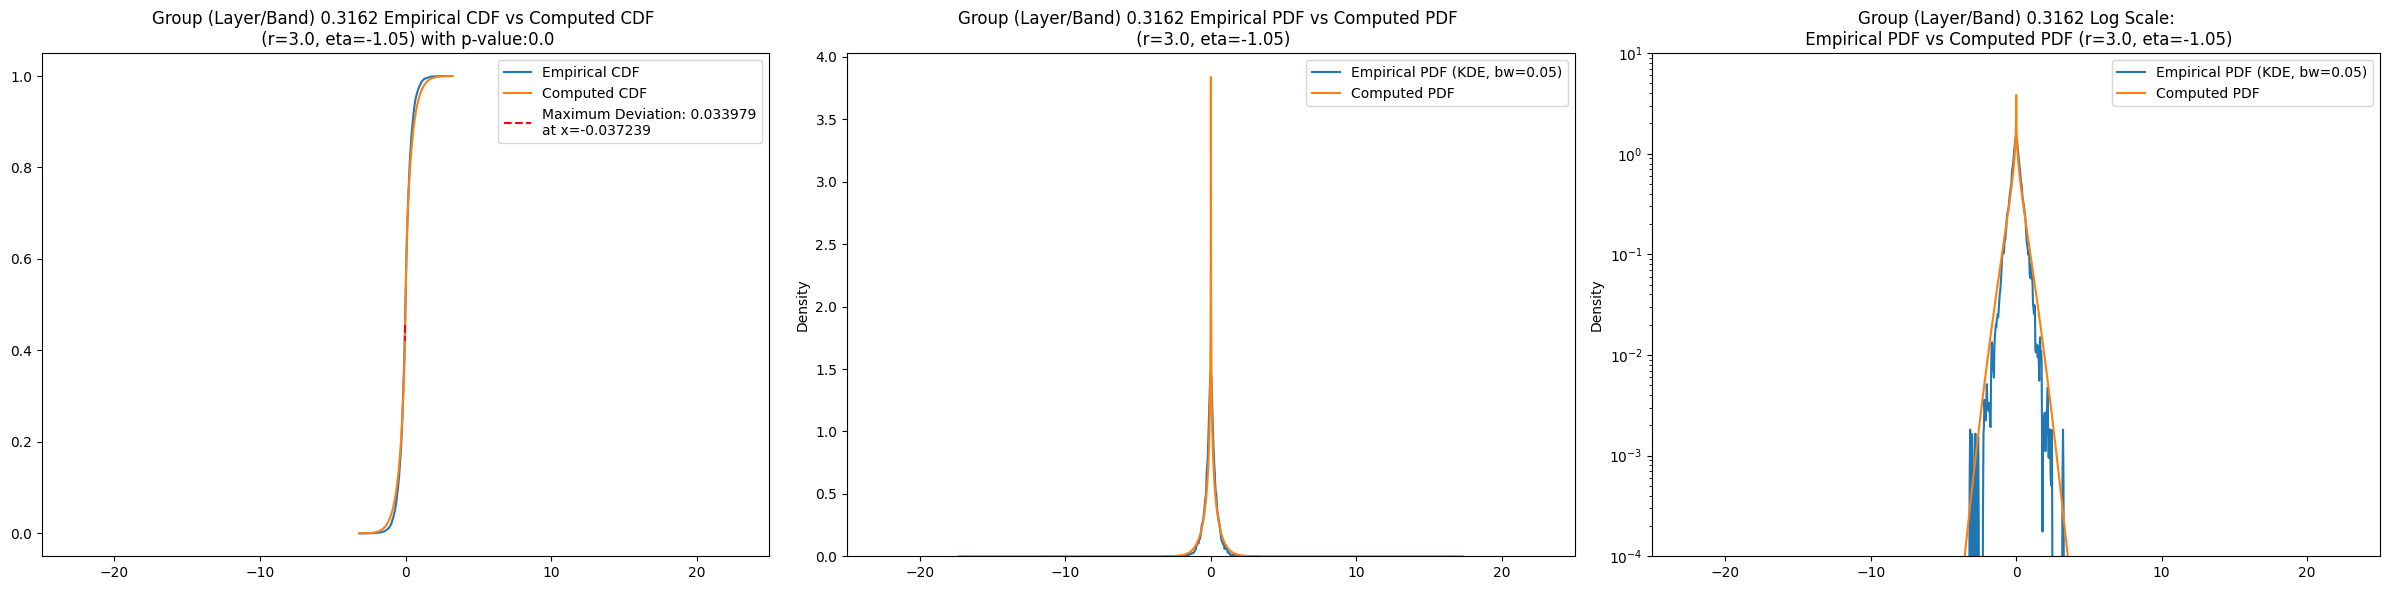

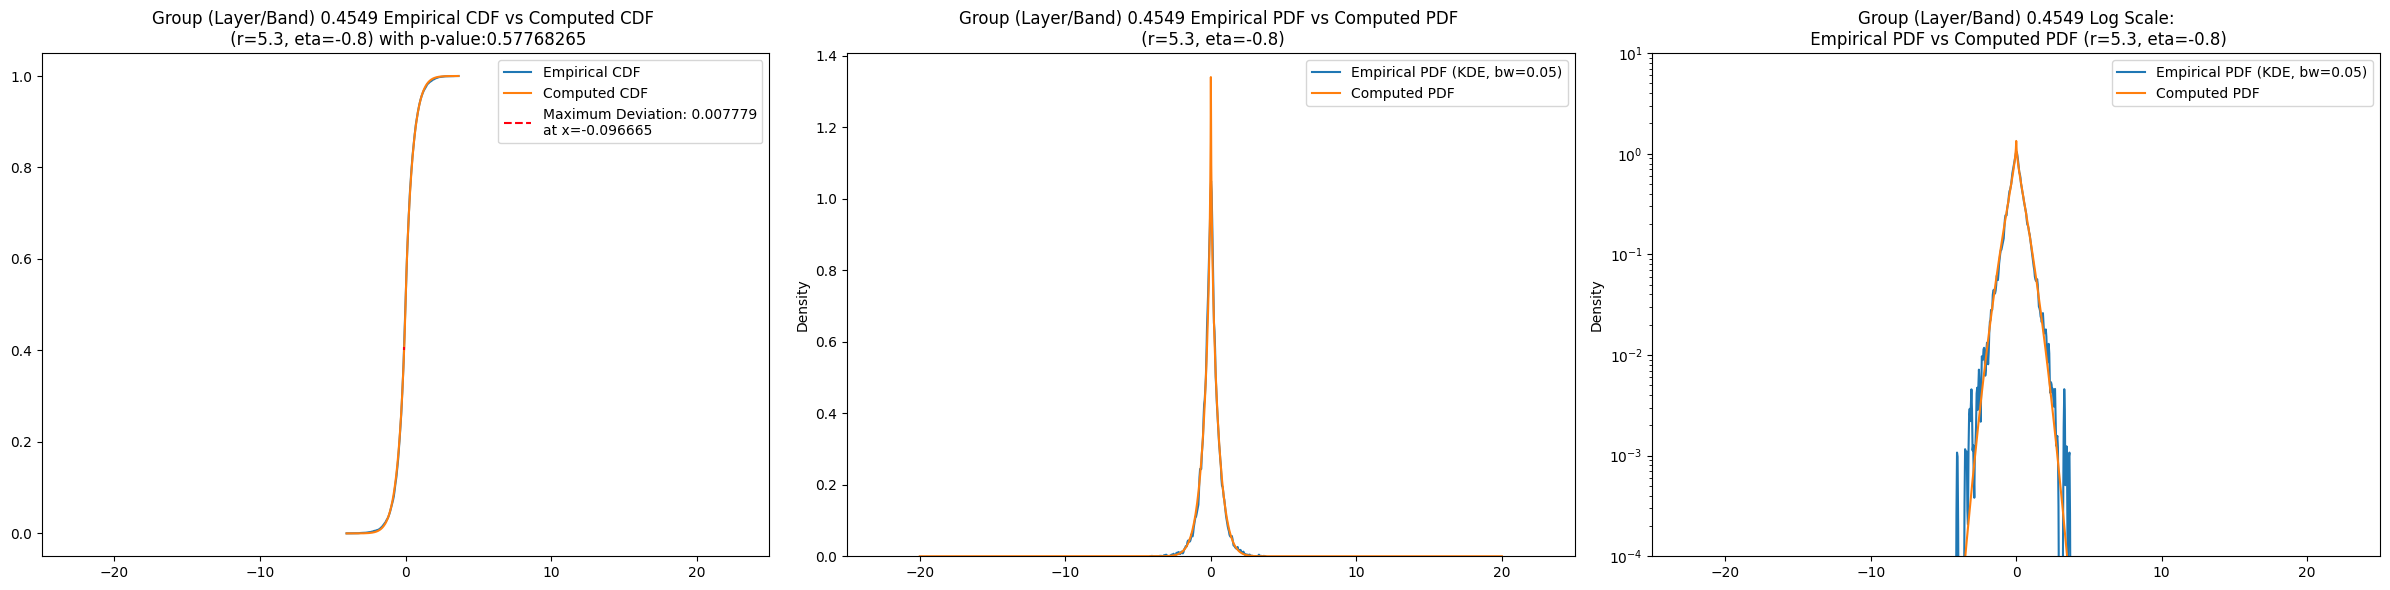

KeyboardInterrupt: 

In [49]:
for group in GROUPS:
    group_info = master_df.loc[group]
    best_r = group_info['best_r']
    best_eta = group_info['best_eta']
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (best_r, best_eta), 
                    log_scale = True,
                    group = group,
                    n_samples=200
                    #interval = (-500, 500),
                    #provided_loc=200
                    )
    fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 300)

## Comparing with Gaussian and Laplace Priors

In [52]:
def generate_func(sample, distro, *args, n_samples=200):
    if distro == 'gaussian' or distro == 'normal':
        def var_func(var):
            cdf = scipy.stats.norm(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'laplace':
        def var_func(var):
            cdf = scipy.stats.laplace(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 't':
        def var_func(var):
            cdf = scipy.stats.t(df=2, scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'prior_r':
        eta = args[0]
        def r_func(r):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return r_func
    elif distro == 'prior_eta':
        r = args[0]
        def eta_func(eta):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return eta_func
    elif distro == 'prior':
        def r_eta_func(params):
            r = params[0]
            eta = params[1]
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples, debug=False)
            return compute_ksstat(sample, cdf)
        return r_eta_func

    print("Please enter a valid argument for `distro`: 'gaussian', 'laplace', 'prior_r', 'prior_eta', 'prior', 't'")

In [53]:
master_df_path = Path(os.path.join(CWD, "CSVs", 'master_df.csv'))

if RERUN or not master_df_path.exists():
    upper_bound = int(1e6)
    for group in GROUPS:
        norm_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'gaussian'), method = 'bounded', bounds = (0, upper_bound))
        laplace_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'laplace'), method = 'bounded', bounds = (0, upper_bound))
        t_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 't'), method = 'bounded', bounds = (0, upper_bound))
        
        master_df.loc[group, 'param_gaussian'] = round_to_sigfigs(norm_result['x'], 6)
        master_df.loc[group, 'kstest_stat_gaussian'] = round_to_sigfigs(norm_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_gaussian'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_gaussian']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6) 

        master_df.loc[group, 'param_t'] = round_to_sigfigs(t_result['x'], 6)
        master_df.loc[group, 'kstest_stat_t'] = round_to_sigfigs(t_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_t'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_t']), 6) 

        master_df.loc[group, 'kstest_pval_gengamma'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_best']))

    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))
    
master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
master_df

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,...,param_gaussian,kstest_stat_gaussian,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma
layer,,,,,,,,,,,,,,,,,,,,,
0.316200,0.193357,0.160801,0.236888,3.385510,1.356045,6.731142,10000.0,3.00,-1.05,0.033979,...,0.347438,0.035299,2.920420e-11,0.311688,0.012724,0.077825,0.252223,0.017174,0.005419,1.821113e-10
0.454900,0.414368,0.341414,0.489554,2.856823,1.484867,5.035099,10000.0,5.30,-0.80,0.007779,...,0.512904,0.031730,3.511240e-09,0.451292,0.004927,0.967441,0.377076,0.011754,0.125175,5.776825e-01
0.654300,0.849068,0.697601,1.023004,3.271503,1.014398,8.106793,10000.0,1.10,-0.54,0.008450,...,0.738360,0.033050,6.334150e-10,0.657415,0.008261,0.499627,0.541326,0.013629,0.048259,4.704222e-01
0.707107,0.988003,0.821338,1.171903,2.609212,1.239022,4.613782,10000.0,0.90,-0.58,0.006937,...,0.802647,0.033076,6.124700e-10,0.703243,0.006999,0.708594,0.587493,0.012957,0.069041,7.189997e-01
0.941200,1.757791,1.465239,2.075051,2.801525,1.308895,4.589595,10000.0,0.75,-0.40,0.005472,...,1.060660,0.030878,1.020440e-08,0.938017,0.005477,0.923415,0.782378,0.011767,0.124400,9.239460e-01
1.354000,3.795530,3.143165,4.456044,2.973003,1.440938,4.982483,10000.0,0.60,-0.28,0.005800,...,1.548110,0.033536,3.315180e-10,1.350160,0.005972,0.865781,1.134240,0.011712,0.127669,8.875928e-01
1.947000,7.681313,6.443957,9.004858,2.827428,1.294215,5.011916,10000.0,0.55,0.00,0.008032,...,2.224110,0.030762,1.178630e-08,2.000080,0.006924,0.721033,1.614810,0.011535,0.138645,5.362736e-01
2.801000,15.985559,13.209583,19.097712,3.130743,1.334741,6.156874,10000.0,0.46,0.00,0.006225,...,3.201180,0.031691,3.688070e-09,2.804100,0.006147,0.841874,2.310960,0.011288,0.155204,8.307600e-01
4.030000,33.039037,27.032692,39.113258,3.058014,1.330339,7.122394,10000.0,0.40,-0.02,0.008413,...,4.597620,0.031287,6.134600e-09,4.011580,0.005715,0.897712,3.346570,0.011667,0.130379,4.761032e-01


In [54]:
# def add_metric_tail(metric_name = 'kstest_ratio',  distro = 'gengamma', tail_cutoffs = [0], layers = np.arange(2, 9)):
#     if metric_name == 'kstest_ratio':
#         metric = compute_ksratio
#     elif metric_name == 'kstest_stat':
#         metric = compute_ksstat_tail

#     for tail_cutoff in tail_cutoffs:
#         metrics = []
#         for layer in layers:
#             if distro == 'gengamma':
#                 cdf = all_cdfs[(master_df.loc[layer, 'initial_r'], master_df.loc[layer, 'initial_eta'])]
#             elif distro == 'gaussian':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_gaussian']).cdf
#             elif distro == 'laplace':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_laplace']).cdf
#             elif distro == 't':
#                 cdf = scipy.stats.t(df = 2, scale = master_df.loc[layer, 'param_t']).cdf
#             metrics.append(metric(group_data_map[layer], cdf, tail_cutoff = tail_cutoff))
#         master_df[metric_name + '_' + distro + '_' + f'tail{tail_cutoff}'] = metrics
        
# for group in GROUPS:
#     add_metric_tail('kstest_ratio', distro = 'gengamma', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 'gaussian', tail_cutoffs= [0,10], layers = np.arange(2, 9)) 
#     add_metric_tail('kstest_ratio', distro = 'laplace', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 't', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_stat', distro = 'gengamma', tail_cutoffs= [2, 10], layers = np.arange(2, 9))

# master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))

# master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
# master_df

## Results

In [51]:
import pandas as pd
import os
master_df = pd.read_csv(os.path.join(os.getcwd(), "CSVs", 'master_df.csv'), index_col = 0)

In [41]:
master_df#.filter(regex='total_samples|kstest_stat.*')
#master_df.filter(regex='total_samples|param.*')
# master_df.filter(regex='.*gaussian')
#master_df.filter(regex='kstest_stat_.*[\_(tail\d)]')
#master_df.filter(regex='.*_tail\d\d?')
#master_df.filter(regex='.*_t_.*')


,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,...,param_gaussian,kstest_stat_gaussian,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma
layer,,,,,,,,,,,,,,,,,,,,,
0.316200,0.193357,0.160801,0.236888,3.385510,1.356045,6.731142,10000.0,3.00,-1.05,0.033979,...,0.347438,0.035299,2.920420e-11,0.311688,0.012724,0.077825,0.252223,0.017174,0.005419,1.821113e-10
0.454900,0.414368,0.341414,0.489554,2.856823,1.484867,5.035099,10000.0,5.30,-0.80,0.007779,...,0.512904,0.031730,3.511240e-09,0.451292,0.004927,0.967441,0.377076,0.011754,0.125175,5.776825e-01
0.654300,0.849068,0.697601,1.023004,3.271503,1.014398,8.106793,10000.0,1.10,-0.54,0.008450,...,0.738360,0.033050,6.334150e-10,0.657415,0.008261,0.499627,0.541326,0.013629,0.048259,4.704222e-01
0.707107,0.988003,0.821338,1.171903,2.609212,1.239022,4.613782,10000.0,0.90,-0.58,0.006937,...,0.802647,0.033076,6.124700e-10,0.703243,0.006999,0.708594,0.587493,0.012957,0.069041,7.189997e-01
0.941200,1.757791,1.465239,2.075051,2.801525,1.308895,4.589595,10000.0,0.75,-0.40,0.005472,...,1.060660,0.030878,1.020440e-08,0.938017,0.005477,0.923415,0.782378,0.011767,0.124400,9.239460e-01
1.354000,3.795530,3.143165,4.456044,2.973003,1.440938,4.982483,10000.0,0.60,-0.28,0.005800,...,1.548110,0.033536,3.315180e-10,1.350160,0.005972,0.865781,1.134240,0.011712,0.127669,8.875928e-01
1.947000,7.681313,6.443957,9.004858,2.827428,1.294215,5.011916,10000.0,0.55,0.00,0.008032,...,2.224110,0.030762,1.178630e-08,2.000080,0.006924,0.721033,1.614810,0.011535,0.138645,5.362736e-01
2.801000,15.985559,13.209583,19.097712,3.130743,1.334741,6.156874,10000.0,0.46,0.00,0.006225,...,3.201180,0.031691,3.688070e-09,2.804100,0.006147,0.841874,2.310960,0.011288,0.155204,8.307600e-01
4.030000,33.039037,27.032692,39.113258,3.058014,1.330339,7.122394,10000.0,0.40,-0.02,0.008413,...,4.597620,0.031287,6.134600e-09,4.011580,0.005715,0.897712,3.346570,0.011667,0.130379,4.761032e-01
